In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import re
from nycc_src.employer import employer as emp
fp = '/home/chansoo/data/nyc_contributions/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%%time
iter_csv = pd.read_csv(f"{fp}/contributions.csv", iterator=True, chunksize=10000)
df = pd.concat(
    [
        chunk[chunk['ELECTION'].astype(str).str.contains('2021')] 
        for chunk in tqdm(iter_csv)
    ]
)
df['id'] = df.index
df = df.loc[df['OFFICECD'].isin(['1','11'])].copy()

130it [00:09, 13.55it/s]


CPU times: user 10.1 s, sys: 936 ms, total: 11.1 s
Wall time: 11 s


<AxesSubplot:xlabel='CANDNAME', ylabel='EMPNAME'>

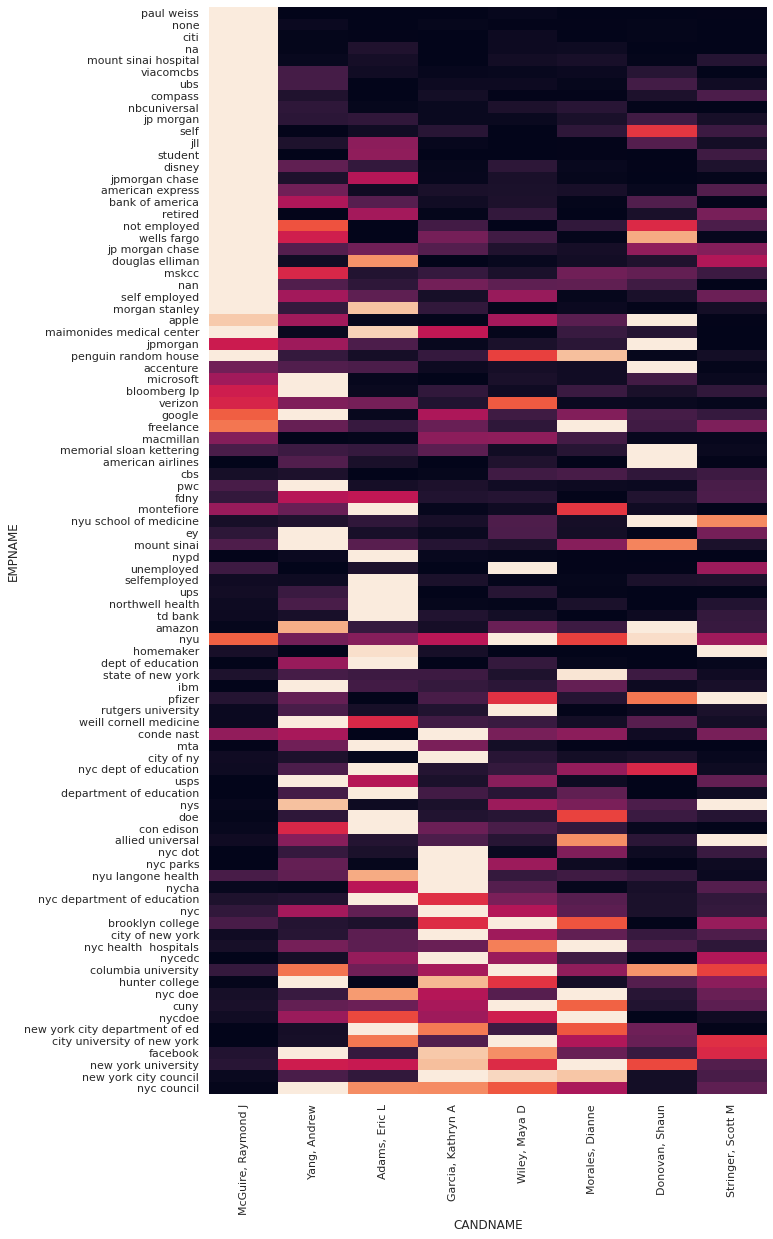

In [30]:
df['EMPNAME'] = emp.cleanname(df['EMPNAME'])
heatmap = emp.heatmap(df=df)
heatmap.heatmap()